In [2]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
  !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash
  !touch .setup_complete

if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

Selecting previously unselected package xvfb.
(Reading database ... 155629 files and directories currently installed.)
Preparing to unpack .../xvfb_2%3a1.19.6-1ubuntu4.10_amd64.deb ...
Unpacking xvfb (2:1.19.6-1ubuntu4.10) ...
Setting up xvfb (2:1.19.6-1ubuntu4.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Starting virtual X frame buffer: Xvfb.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# OpenAI Gym

Observation space:  Box(-1.2000000476837158, 0.6000000238418579, (2,), float32)
Action space:  Discrete(3)


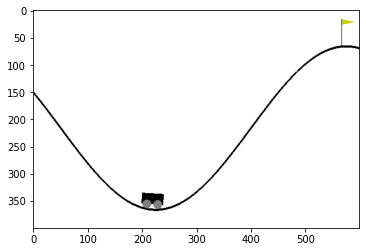

In [5]:
import gym

env = gym.make("MountainCar-v0")
env.reset()

plt.imshow(env.render('rgb_array'))
print("Observation space: ", env.observation_space)
print("Action space: ", env.action_space)

### Gym Interface

The three main methods of an environment are:

* `reset()`: reset environment to the initial state, return first observation
* `render()`: show current environment state (a more colorful version :) )
* `step(a)`: commit action a and return (new_observation, reward, is_done, info)
  * `new_observation`: an observation right after committing the action a
  * `reward`: a number representing your reward for committing action a
  * `is_done`: True if the MDP has just finished, False if still in progress
  * `info`: some auxiliary stuff about what just happened

In [6]:
obs0 = env.reset()
print("initial observation: ", obs0)

# in MountainCar env, it will print two numbers: car position and velocity

initial observation:  [-0.53654808  0.        ]


In [7]:
print("taking action 2 (right)")
new_obs, reward, is_done, _ = env.step(2)

print("new observation code:", new_obs)
print("reward:", reward)
print("is game over?:", is_done)

taking action 2 (right)
new observation code: [-0.53545099  0.0010971 ]
reward: -1.0
is game over?: False


In [8]:
from IPython import display

# Create env manually to set time limit

TIME_LIMIT = 250
env = gym.wrappers.TimeLimit(
    gym.envs.classic_control.MountainCarEnv(),
    max_episode_steps=TIME_LIMIT + 1,
)
actions = {'left': 0, 'stop': 1, 'right': 2}

In [18]:
# hard coded policy

def policy(obs, t):
  position, velocity = obs
  if velocity < 0:
    return actions['left']
  if velocity == 0:
    return actions['right']
  if velocity > 0:
    return actions['right']

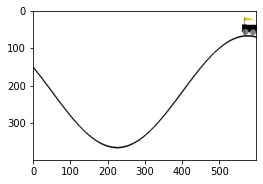

In [19]:
plt.figure(figsize=(4, 3))
display.clear_output(wait=True)

obs = env.reset()
for t in range(TIME_LIMIT):
    plt.gca().clear()
    
    action = policy(obs, t)  # Call your policy
    obs, reward, done, _ = env.step(action)  # Pass the action chosen by the policy to the environment
    
    # We don't do anything with reward here because MountainCar is a very simple environment,
    # and reward is a constant -1. Therefore, your goal is to end the episode as quickly as possible.

    # Draw game image on display.
    plt.imshow(env.render('rgb_array'))
    
    display.display(plt.gcf())
    display.clear_output(wait=True)

    if done:
        print("Well done!")
        break
else:
    print("Time limit exceeded. Try again.")

display.clear_output(wait=True)

In [20]:
assert obs[0] > 0.47
print("You solved it!")

You solved it!
